## 3. Análisis de la expresión de los marcadores en función del subtipo molecular

In [1]:
# Importaciones de los paquetes necesarios para el análisis
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind

Importación de las tablas con los datos clínicos y de expresión

In [2]:
os.chdir("/Users/Sara/Documents/TFM/TablasDatosClinicos")
TCGA = pd.read_csv('TCGAClinicaExp.csv')
TCGA.head()

,ID_Paciente,Tiempo,Supervivencia,Edad,Sexo,Estadío agrupado,Grado agrupado,Subtipo molecular,A1BG,A1CF,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
0,TCGA.2J.AAB6.01,293,1,75,1,0.0,0.0,1,2.297025,0.096002,...,0.315160,5.348758,8.599770,0.015360,9.244299,536.004610,6.483578,15.014722,0.746628,0.000000
1,TCGA.2J.AAB8.01,80,0,71,1,1.0,1.0,0,1.988100,0.493875,...,0.958377,8.816501,8.425653,0.122919,11.454073,332.460793,7.690131,18.916415,3.020611,0.000000
2,TCGA.2J.AAB9.01,627,1,70,0,1.0,0.0,1,2.593508,0.220540,...,1.094688,6.656577,6.711048,0.024700,7.668009,325.450251,7.093374,12.553404,0.747060,0.000000
3,TCGA.2J.AABA.01,607,1,55,1,1.0,0.0,0,3.708424,0.294523,...,1.516058,7.807530,16.502740,0.043982,17.095512,295.889471,13.611275,26.468188,1.187701,0.065361
4,TCGA.2J.AABE.01,676,0,73,1,0.0,0.0,0,2.802831,0.045728,...,1.546818,10.855597,11.042890,0.020486,9.650307,432.691154,7.855796,14.790268,1.726023,0.000000


In [3]:
CA = pd.read_csv('CAClinicaExp.csv')
CA.head()

,ID_Paciente,Tiempo,Supervivencia,Edad,Sexo,Estadío agrupado,Subtipo molecular,Grado agrupado,OR4F5,LINC01128,...,PRY,TTTY17A,TTTY4,BPY2,DAZ1,DAZ2,DAZ3,DAZ4,CDY1,TTTY3
0,DO49421,385,1,74.0,0,1.0,0,1.0,0.0,0.507358,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,DO49433,456,1,48.0,1,1.0,1,1.0,0.0,0.083610,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,DO49478,653,0,81.0,1,0.0,0,0.0,0.0,0.652367,...,0.0,0.0,0.0,0.0,1.698045,1.827681,0.985857,0.200283,0.0,0.0
3,DO51468,1083,1,69.0,1,1.0,0,1.0,0.0,0.180139,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,DO51480,228,1,41.0,0,1.0,0,1.0,0.0,0.603468,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [4]:
AUseq = pd.read_csv('AUseqClinicaExp.csv')
AUseq.head()

,ID_Paciente,Tiempo,Supervivencia,Edad,Sexo,Grado agrupado,Estadío agrupado,Subtipo molecular,TSPAN6,TNMD,...,ZNF587B,RAB11B-AS1,SPIB,ERVV-1,C10orf95-AS1,ZIM2,MIR1470,KCNQ1OT1,RNF225,EGLN2
0,DO32860,1259.0,1,57.0,1.0,0.0,1.0,0.0,46.518133,0.043857,...,18.989886,5.460595,3.464287,0.000000,21.537766,0.218794,0.0,12.479457,0.134187,47.443532
1,DO32863,715.0,1,60.0,1.0,1.0,1.0,0.0,61.902894,0.065983,...,7.981509,2.836338,0.906453,0.000000,8.352220,0.123443,0.0,3.269647,0.201888,41.496944
2,DO32875,348.0,1,69.0,1.0,1.0,1.0,0.0,93.287225,0.032581,...,10.982284,4.636182,25.330459,0.059486,20.682612,0.040635,0.0,10.178653,0.299061,85.633412
3,DO32878,260.0,1,69.0,0.0,1.0,1.0,0.0,47.796547,0.000000,...,6.885649,7.948237,0.920802,0.072521,8.959333,0.185774,0.0,4.869373,0.729186,48.870152
4,DO32900,768.0,1,51.0,1.0,1.0,1.0,0.0,87.561009,0.028971,...,14.977515,4.466067,3.109333,0.000000,20.238496,0.397466,0.0,12.822182,0.177285,56.235582


In [5]:
AUarray = pd.read_csv('AUarrayClinicaExp.csv')
AUarray.head()

,ID_Paciente,Tiempo,Supervivencia,Edad,Sexo,Estadío agrupado,Grado agrupado,Subtipo molecular,A1BG,A1CF,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,DO32825,2848,1,77.0,0.0,1.0,0.0,0,4.486109,6.600279,...,4.399662,3.134297,2.175956,3.529960,3.146886,1.676103,8.613931,8.523744,4.263163,8.390478
1,DO32833,56,1,74.0,0.0,1.0,0.0,0,3.782777,5.792833,...,3.846866,3.241346,2.315944,4.745813,4.114472,1.607233,8.652961,8.768862,5.664762,7.451202
2,DO32835,1209,1,72.0,1.0,1.0,0.0,0,2.408077,4.661117,...,3.459662,2.303770,2.215162,4.100062,4.513817,1.517811,9.152117,9.870171,6.810072,7.748490
3,DO32837,399,1,34.0,1.0,0.0,1.0,0,3.537787,2.092468,...,4.390631,2.659673,3.124757,3.211065,4.655843,1.700241,9.567213,9.365409,5.851211,8.722147
4,DO32843,1048,1,60.0,0.0,1.0,0.0,0,3.921122,7.008159,...,4.140578,3.534411,2.228521,5.354255,4.552003,1.670322,8.506996,8.746793,6.045323,8.219348


In [6]:
Marcadores_significativos = ["PSCA", "SCEL", "COL17A1"]

In [7]:
def ComparacionGrupos (Cohorte, Proteinas, key):
    Cohorte["Subtipo"] = Cohorte['Subtipo molecular'].replace({0: "Clásico", 1: "Basal"})
    colores = {'PSCA': 'turquoise', 'SCEL': 'springgreen', 'COL17A1': 'coral'}
    for Proteina in Proteinas:
        plt.figure(figsize=(4, 4))
        ## Análisis de expresión de la proteína por Moffit subtype
        sns.boxplot(x='Subtipo', y= Proteina, data=Cohorte, showfliers=False, color = colores[Proteina], order = ["Basal", "Clásico"])
        sns.swarmplot(x='Subtipo', y= Proteina, data=Cohorte, color='black', alpha=0.5,  size=2.5)  # Agrega puntos
        # Calcular los límites basados en los datos
        plt.ylim(min(Cohorte[Proteina]) - 0.25*min(Cohorte[Proteina]), max(Cohorte[Proteina]) + 0.25*max(Cohorte[Proteina]))
        plt.xlabel('Subtipo')
        plt.ylabel('Expresión ' + Proteina)
        plt.title('Subtipo molecular en la cohorte '+ key)
        plt.show()
        descriptive_stats = Cohorte.groupby('Subtipo')[Proteina].describe()
        desvest = Cohorte.groupby('Subtipo')[Proteina].sem()
        print(descriptive_stats)
        print("Desviación estándar de la media: ", desvest)

        grupo_Basal = Cohorte[Cohorte['Subtipo'] == 'Basal'][Proteina]
        grupo_Classical = Cohorte[Cohorte['Subtipo'] == 'Clásico'][Proteina]
        t_statistic, p_value = ttest_ind(grupo_Basal, grupo_Classical)
        print("Prueba t de Student Basal con Clasic:")
        print("Estadístico de prueba:", t_statistic)
        print("Valor p:", p_value)

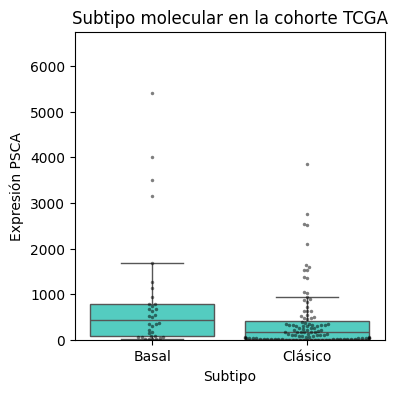

         count        mean          std       min        25%         50%  \
Subtipo                                                                    
Basal     34.0  860.327983  1271.063232  15.00688  89.315750  431.880521   
Clásico  107.0  406.006399   660.872727   0.00000  23.623465  166.430417   

                75%          max  
Subtipo                           
Basal    787.101516  5403.484432  
Clásico  421.295617  3843.259779  
Desviación estándar de la media:  Subtipo
Basal      217.985546
Clásico     63.888978
Name: PSCA, dtype: float64
Prueba t de Student Basal con Clasic:
Estadístico de prueba: 2.726086764183793
Valor p: 0.007234460129327828


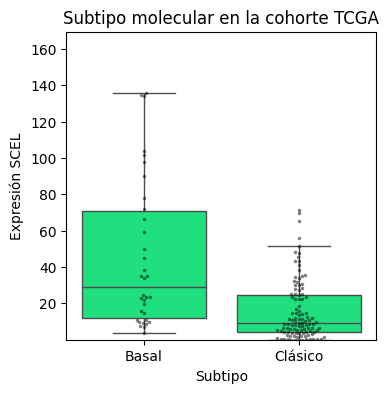

         count       mean        std       min        25%        50%  \
Subtipo                                                                
Basal     34.0  45.703260  40.890943  3.816884  11.885265  29.075413   
Clásico  107.0  15.778023  16.504839  0.010145   4.117328   9.382969   

               75%         max  
Subtipo                         
Basal    70.544312  135.547365  
Clásico  24.823370   71.465757  
Desviación estándar de la media:  Subtipo
Basal      7.012739
Clásico    1.595583
Name: SCEL, dtype: float64
Prueba t de Student Basal con Clasic:
Estadístico de prueba: 6.181421168753676
Valor p: 6.634994714490557e-09


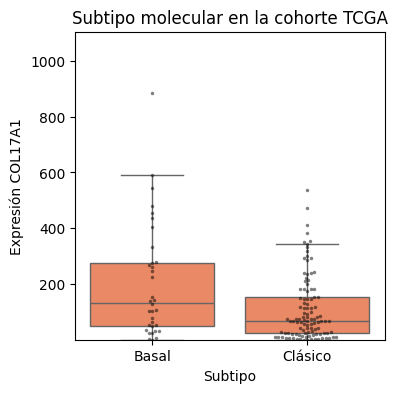

         count        mean         std       min        25%         50%  \
Subtipo                                                                   
Basal     34.0  206.018017  207.669792  0.750778  50.545486  132.362553   
Clásico  107.0  109.648635  116.108154  0.220830  22.730433   68.566241   

                75%         max  
Subtipo                          
Basal    276.840714  883.649894  
Clásico  152.406813  537.925553  
Desviación estándar de la media:  Subtipo
Basal      35.615076
Clásico    11.224599
Name: COL17A1, dtype: float64
Prueba t de Student Basal con Clasic:
Estadístico de prueba: 3.417274288597298
Valor p: 0.000829925336809504


c:\Users\Sara\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


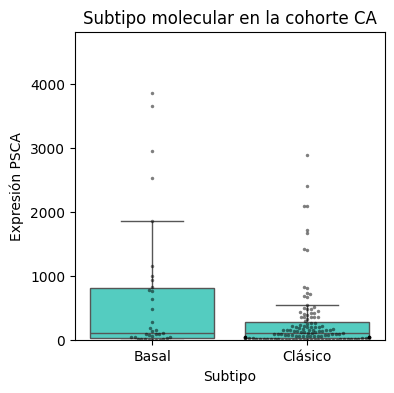

         count        mean          std       min        25%         50%  \
Subtipo                                                                    
Basal     35.0  652.025146  1051.545539  0.490796  34.234368  104.455773   
Clásico  128.0  272.948652   489.748955  0.000000  22.802851   97.968069   

                75%          max  
Subtipo                           
Basal    804.009588  3847.597667  
Clásico  271.734822  2887.540179  
Desviación estándar de la media:  Subtipo
Basal      177.743637
Clásico     43.288101
Name: PSCA, dtype: float64
Prueba t de Student Basal con Clasic:
Estadístico de prueba: 3.056672642781405
Valor p: 0.0026209714290897843


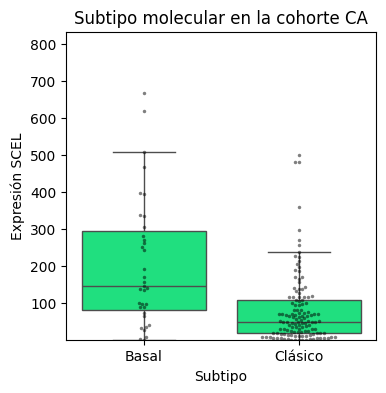

         count        mean         std       min        25%         50%  \
Subtipo                                                                   
Basal     35.0  204.416797  174.559729  0.200194  80.962682  145.465542   
Clásico  128.0   79.843760   94.527801  0.183316  17.847993   49.203244   

                75%         max  
Subtipo                          
Basal    292.467637  665.566368  
Clásico  108.351285  499.472685  
Desviación estándar de la media:  Subtipo
Basal      29.505980
Clásico     8.355156
Name: SCEL, dtype: float64
Prueba t de Student Basal con Clasic:
Estadístico de prueba: 5.624314960220064
Valor p: 8.057092713309132e-08


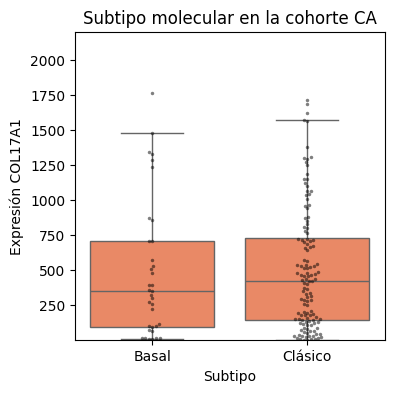

         count        mean         std       min         25%         50%  \
Subtipo                                                                    
Basal     35.0  488.093895  492.444445  3.257893   94.064428  346.710990   
Clásico  128.0  502.361974  436.541189  0.821714  140.066974  423.197548   

                75%          max  
Subtipo                           
Basal    703.461447  1761.640146  
Clásico  729.304336  1717.573741  
Desviación estándar de la media:  Subtipo
Basal      83.238304
Clásico    38.585154
Name: COL17A1, dtype: float64
Prueba t de Student Basal con Clasic:
Estadístico de prueba: -0.16662299191303173
Valor p: 0.8678757790023938


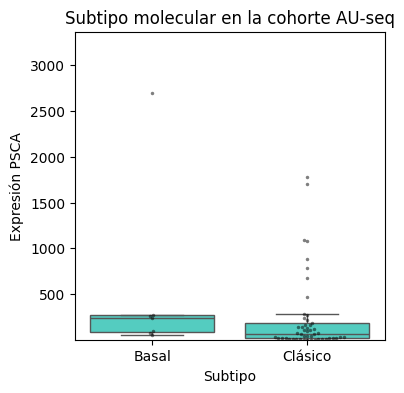

         count        mean         std        min        25%         50%  \
Subtipo                                                                    
Basal      7.0  527.050730  960.053323  49.096481  85.571672  236.968388   
Clásico   49.0  234.313129  414.835190   1.206689  16.453104   67.774788   

                75%          max  
Subtipo                           
Basal    269.189912  2693.767074  
Clásico  188.963539  1775.891912  
Desviación estándar de la media:  Subtipo
Basal      362.866048
Clásico     59.262170
Name: PSCA, dtype: float64
Prueba t de Student Basal con Clasic:
Estadístico de prueba: 1.4336370763028317
Valor p: 0.15744102793888787


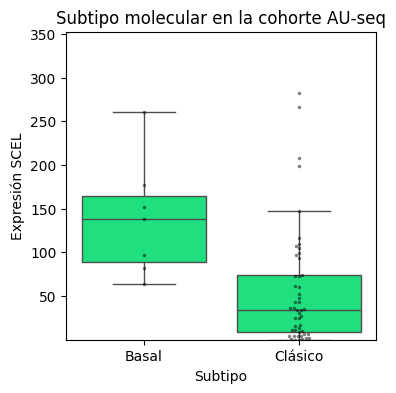

         count        mean        std        min        25%         50%  \
Subtipo                                                                   
Basal      7.0  138.521113  67.081909  63.595876  89.308883  138.713050   
Clásico   49.0   56.479745  67.354831   0.077286   8.945647   33.994959   

                75%         max  
Subtipo                          
Basal    164.273355  260.174391  
Clásico   73.705039  281.941179  
Desviación estándar de la media:  Subtipo
Basal      25.354578
Clásico     9.622119
Name: SCEL, dtype: float64
Prueba t de Student Basal con Clasic:
Estadístico de prueba: 3.015868598744758
Valor p: 0.003900766151026493


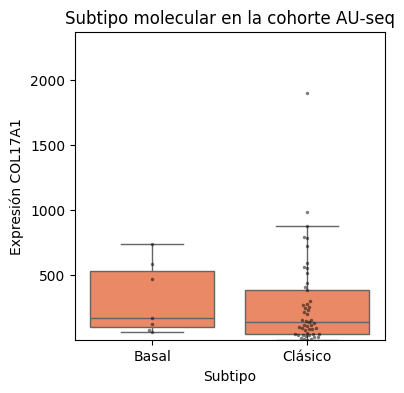

         count        mean         std        min        25%         50%  \
Subtipo                                                                    
Basal      7.0  315.971865  276.388614  57.977102  96.301851  169.332143   
Clásico   49.0  274.865105  348.641010   1.247938  46.899858  134.466464   

                75%          max  
Subtipo                           
Basal    528.249194   735.391724  
Clásico  386.829541  1895.616181  
Desviación estándar de la media:  Subtipo
Basal      104.465077
Clásico     49.805859
Name: COL17A1, dtype: float64
Prueba t de Student Basal con Clasic:
Estadístico de prueba: 0.2980178184261246
Valor p: 0.7668332252175125


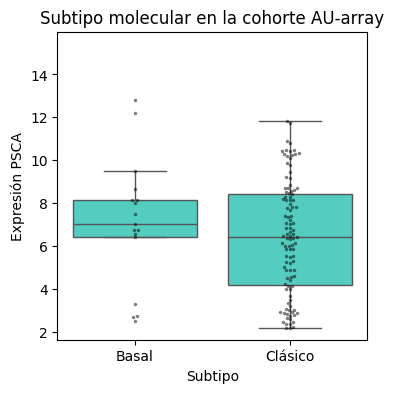

         count      mean       std       min       25%       50%       75%  \
Subtipo                                                                      
Basal     17.0  7.039342  3.008799  2.522921  6.398023  7.042788  8.149563   
Clásico  108.0  6.423801  2.629755  2.178067  4.198602  6.427157  8.420110   

               max  
Subtipo             
Basal    12.791030  
Clásico  11.822674  
Desviación estándar de la media:  Subtipo
Basal      0.729741
Clásico    0.253048
Name: PSCA, dtype: float64
Prueba t de Student Basal con Clasic:
Estadístico de prueba: 0.8795569745422103
Valor p: 0.3808145190496549


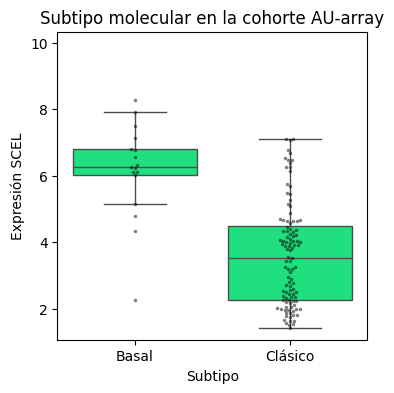

         count      mean       std       min       25%       50%       75%  \
Subtipo                                                                      
Basal     17.0  6.151961  1.431190  2.261675  6.023713  6.249271  6.806079   
Clásico  108.0  3.606798  1.540682  1.415986  2.245728  3.528074  4.495504   

              max  
Subtipo            
Basal    8.267850  
Clásico  7.108784  
Desviación estándar de la media:  Subtipo
Basal      0.347114
Clásico    0.148252
Name: SCEL, dtype: float64
Prueba t de Student Basal con Clasic:
Estadístico de prueba: 6.388386574449086
Valor p: 3.1257893709696522e-09


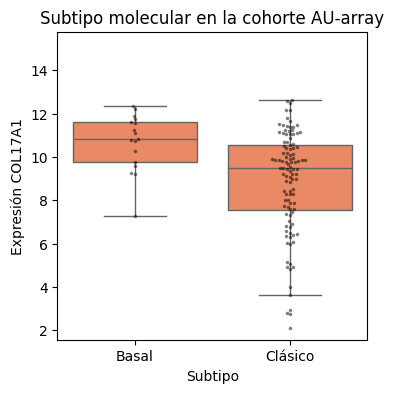

         count       mean       std       min       25%        50%        75%  \
Subtipo                                                                         
Basal     17.0  10.676138  1.323047  7.268904  9.756805  10.822991  11.610774   
Clásico  108.0   8.883441  2.365852  2.083375  7.555682   9.474634  10.569200   

               max  
Subtipo             
Basal    12.352782  
Clásico  12.627785  
Desviación estándar de la media:  Subtipo
Basal      0.320886
Clásico    0.227654
Name: COL17A1, dtype: float64
Prueba t de Student Basal con Clasic:
Estadístico de prueba: 3.0432452538743946
Valor p: 0.0028622855098796207


In [8]:
ComparacionGrupos (TCGA, Marcadores_significativos, "TCGA")
ComparacionGrupos (CA, Marcadores_significativos, "CA")
ComparacionGrupos (AUseq, Marcadores_significativos, "AU-seq")
ComparacionGrupos (AUarray, Marcadores_significativos, "AU-array")